# Tutorial 4

1. Import Data


In [4]:
import pandas as pd

data = pd.read_excel('data.xlsx', sheet_name='Data') 
print("Data Table: {} rows & {} columns".format(*data.shape))
display(data.head(10)) # View data table (top 10 rows)

peak = pd.read_excel('data.xlsx', sheet_name='Peak') 
print("Peak Table: {} rows & {} columns".format(*peak.shape))
display(peak.head(10))

Data Table: 91 rows & 3087 columns


,Order,SampleType,QC,M1,M2,M3,M4,M5,M6,M7,...,M3075,M3076,M3077,M3078,M3079,M3080,M3081,M3082,M3083,M3084
0,1,QC,1,1.837062e+08,1.296528e+08,3.961182e+07,3.732578e+07,5.339865e+06,1.031822e+08,9.409682e+06,...,35153.206002,15735.886504,24928.165047,30134.444665,3035.247672,18271.101975,20981.783849,3523.418763,23752.440055,17161.698785
1,2,QC,1,2.030571e+08,1.178121e+08,6.361418e+07,6.682747e+07,5.572493e+06,9.366510e+07,9.941482e+06,...,36701.059662,15590.522963,24776.756320,30250.013996,3052.288747,22116.296519,24543.382677,3389.677457,24262.317947,18949.290754
2,3,Sample,0,1.285728e+08,2.726444e+08,4.611692e+07,4.717621e+07,3.178726e+06,8.077425e+07,6.924520e+06,...,43120.310719,16378.981747,28627.451582,31297.776297,1738.358685,17695.679626,16703.470005,1113.489872,29717.457693,14683.792853
3,4,Sample,0,1.491128e+08,1.955086e+08,5.212802e+07,5.114760e+07,3.428193e+06,8.211311e+07,7.416907e+06,...,44663.545552,17429.459487,25703.703594,26399.809078,846.020446,15306.546820,15198.095655,1137.752119,26610.868749,11913.223789
4,5,Sample,0,1.590268e+08,3.780061e+08,4.238071e+07,4.282051e+07,3.186309e+06,1.000761e+08,7.030797e+06,...,41770.351723,18467.519040,27371.393974,28374.785933,1959.397898,14904.243032,15625.089253,1101.738536,26496.665356,12750.259715
5,6,Sample,0,1.875314e+08,7.153474e+07,5.007826e+07,5.036435e+07,4.849348e+06,9.998757e+07,1.039036e+07,...,41616.726360,11426.528395,23313.373795,28582.727888,872.115128,15301.063816,14321.556052,1030.238432,32587.650554,18655.811727
6,7,QC,1,1.983585e+08,1.204062e+08,5.190127e+07,5.180519e+07,5.348706e+06,8.966852e+07,9.605938e+06,...,32839.675140,16262.163327,21298.643088,28065.010551,3277.276918,20071.616958,18198.098904,3047.831055,24997.154651,14494.628663
7,8,Sample,0,1.460268e+08,2.274148e+08,5.872350e+07,5.581725e+07,4.342786e+06,1.059740e+08,1.401639e+07,...,35339.968664,25426.050392,51819.646796,21762.932664,1822.815140,23457.954245,23651.858710,1210.741328,22834.426860,15771.899526
8,9,Sample,0,1.381372e+08,1.269111e+08,5.276344e+07,4.936756e+07,3.005090e+06,8.101362e+07,1.484466e+07,...,33766.256647,15963.341703,50651.507533,18503.876558,843.925809,16572.962662,16625.898352,1186.166100,25623.108950,13811.758227
9,10,Sample,0,1.601298e+08,4.347327e+08,4.883041e+07,4.518047e+07,3.326398e+06,7.714394e+07,1.239396e+07,...,31442.161072,22600.725041,51901.700174,16804.403434,1522.101762,19948.743747,22690.058851,1229.664436,22637.770945,15009.816887


Peak Table: 3084 rows & 6 columns


,Idx,Name,Mol_Weight,RT_minutes,RSD,D_Ratio
0,1,M1,113.05902,1.276,5.012937,0.28
1,2,M2,203.11564,0.950,9.557013,0.19
2,3,M3,161.10514,1.428,16.085023,0.26
3,4,M4,129.07893,1.400,18.035797,0.49
4,5,M5,161.10510,1.272,19.515359,0.40
5,6,M6,225.94404,5.923,6.510319,0.33
6,7,M7,194.08026,1.169,2.890900,0.03
7,8,M8,115.06345,7.067,4.733385,0.16
8,9,M9,131.09461,6.220,6.138996,0.33
9,10,M10,117.07900,6.971,4.783892,0.32


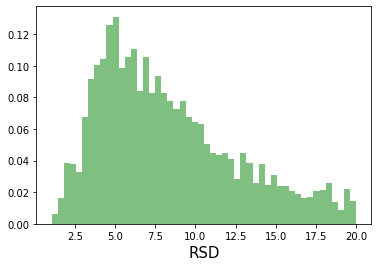

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(peak.RSD, 50, density=True, facecolor='g', alpha=0.5) 
plt.xlabel('RSD', fontsize=15)
plt.show()

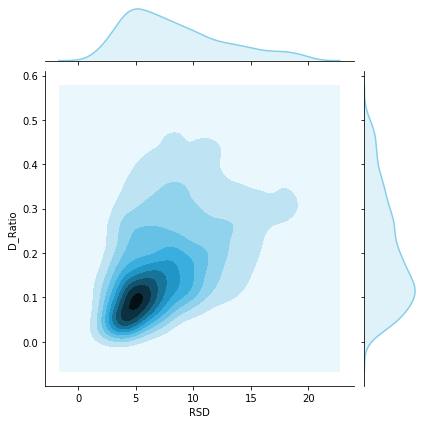

In [6]:
import seaborn as sns

sns.jointplot(x=peak.RSD, y=peak.D_Ratio, kind='kde', color="skyblue") 

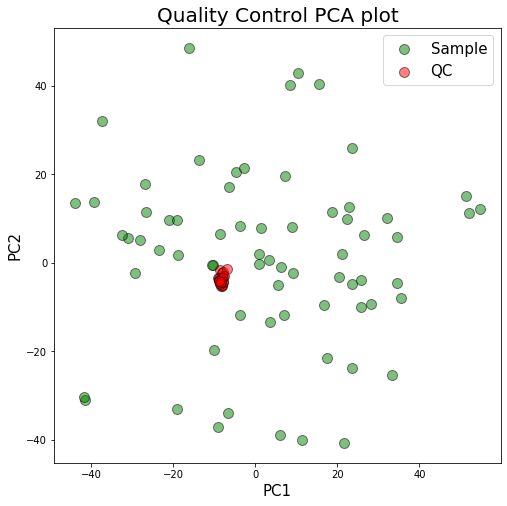

In [7]:
# Import
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Extract X matrix
names = peak['Name']
x = data[names].values
x = np.log(x)
x = StandardScaler().fit_transform(x)

# Create and fit PCA
pca = PCA(n_components=2)
scores = pca.fit_transform(x)
label = data['SampleType']

# Split scores into sample and QC
Sample_scores = scores[label == 'Sample',:]
QC_scores = scores[label == 'QC',:]

# Plot Sample score and QC score
fig = plt.figure(figsize=(8,8))
h1 = plt.scatter(Sample_scores[:,0],Sample_scores[:,1],edgecolors='Black', facecolors='Green',s=100,alpha=0.5)
h2 = plt.scatter(QC_scores[:,0],QC_scores[:,1], edgecolors='Black', facecolors='Red',s=100,alpha=0.5)

# Add legend, labels, and title
plt.legend((h1,h2),('Sample','QC'),fontsize=15)
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.title('Quality Control PCA plot',fontsize=20)

# Show plot
plt.show()

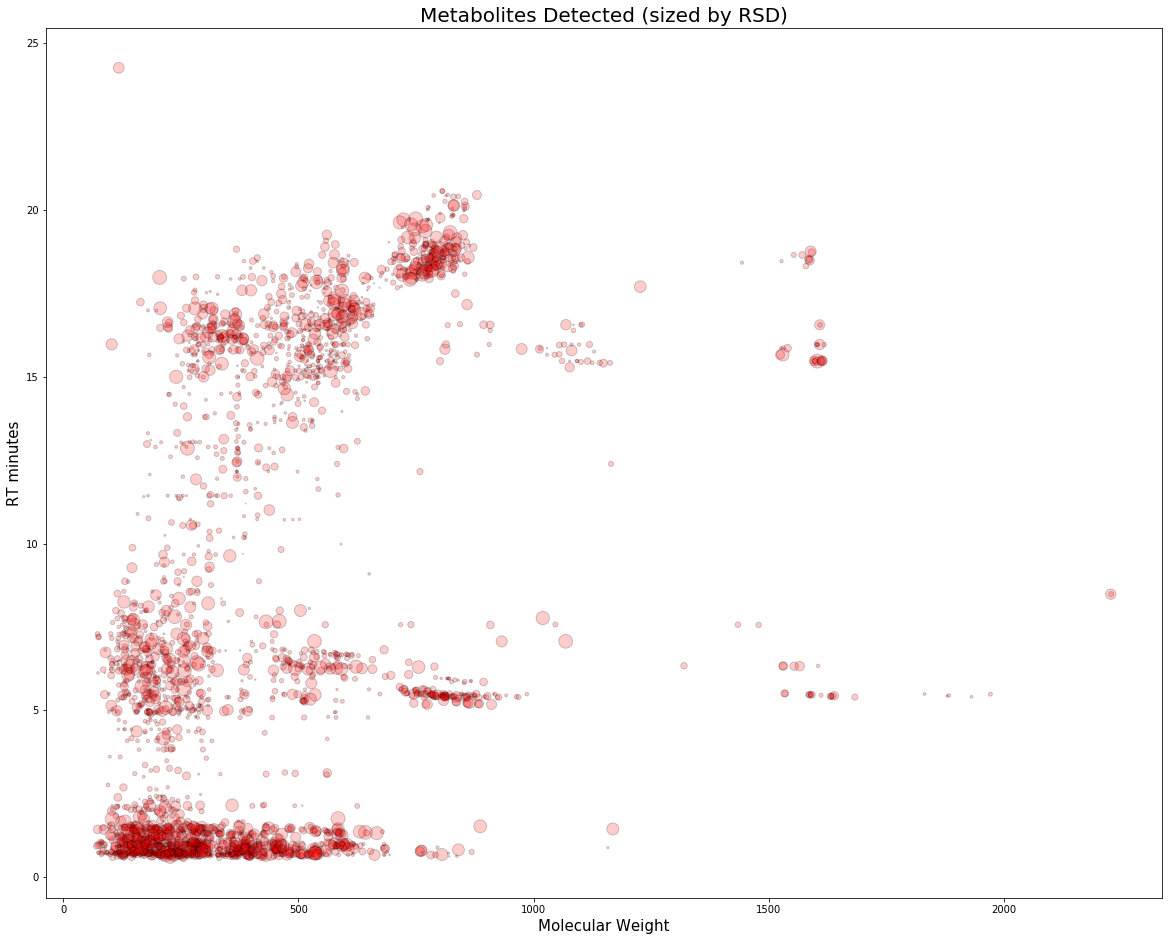

In [8]:
# Scatterplot of Mol_Weight vs. RT_minute with size RSD^2/2, and colour red
fig = plt.figure(figsize=(20,16))
plt.scatter(peak.Mol_Weight, peak.RT_minutes, s=peak.RSD**2/2, alpha=0.2, edgecolors='black', c='red') 
plt.xlabel('Molecular Weight', fontsize=15)
plt.ylabel('RT minutes', fontsize=15)
plt.title('Metabolites Detected (sized by RSD)',fontsize=20)
plt.show()